In [27]:
import seaborn as sns

In [28]:
import pandas as pd

train_data = pd.read_csv('cleaned_train.csv')
test_data = pd.read_csv('cleaned_test.csv')

In [29]:
train_data.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Group', 'PeopleId', 'Num', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split

y = train_data['Transported'].astype(int)
x = train_data.drop('Transported', axis=1)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.1,random_state=42)

In [31]:
x.shape

(8494, 27)

In [48]:
from tensorflow import keras
from tensorflow.keras import layers

In [49]:
model = keras.Sequential([
    layers.Dense(units=27, activation='relu', input_shape=[27]),
    layers.Dense(units=1, activation='softmax')
])

In [50]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [51]:
model.compile(optimizer='Adam', loss="mean_absolute_error", metrics=["accuracy"])

In [52]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, min_delta=0.001, restore_best_weights=True)

In [53]:
history = model.fit(
    x_train,y_train,
    validation_data=(x_val,y_val),
    epochs=200,
    batch_size=256,
    callbacks=early_stopping
)

Epoch 1/200
30/30 [==============================] - 2s 17ms/step - loss: 0.4950 - accuracy: 0.5050 - val_loss: 0.5082 - val_accuracy: 0.4918
Epoch 2/200
30/30 [==============================] - 0s 6ms/step - loss: 0.4950 - accuracy: 0.5050 - val_loss: 0.5082 - val_accuracy: 0.4918
Epoch 3/200
30/30 [==============================] - 0s 5ms/step - loss: 0.4950 - accuracy: 0.5050 - val_loss: 0.5082 - val_accuracy: 0.4918
Epoch 4/200
30/30 [==============================] - 0s 5ms/step - loss: 0.4950 - accuracy: 0.5050 - val_loss: 0.5082 - val_accuracy: 0.4918
Epoch 5/200
30/30 [==============================] - 0s 6ms/step - loss: 0.4950 - accuracy: 0.5050 - val_loss: 0.5082 - val_accuracy: 0.4918
Epoch 6/200
30/30 [==============================] - 0s 6ms/step - loss: 0.4950 - accuracy: 0.5050 - val_loss: 0.5082 - val_accuracy: 0.4918


KeyError: "None of [Index(['binary_accuracy', 'val_binary_accuracy'], dtype='object')] are in the [columns]"

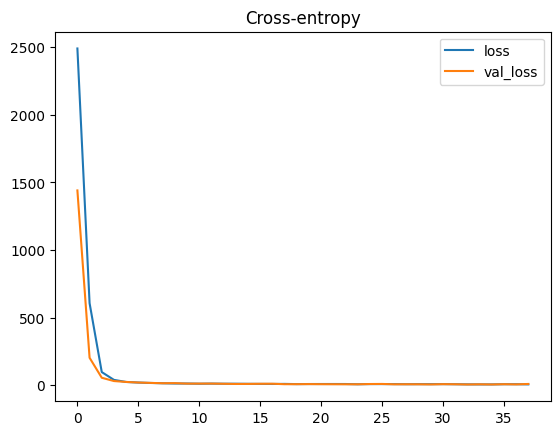

In [14]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [54]:
result = model.predict(test_data)

134/134 [==============================] - 0s 2ms/step


<AxesSubplot: ylabel='Count'>

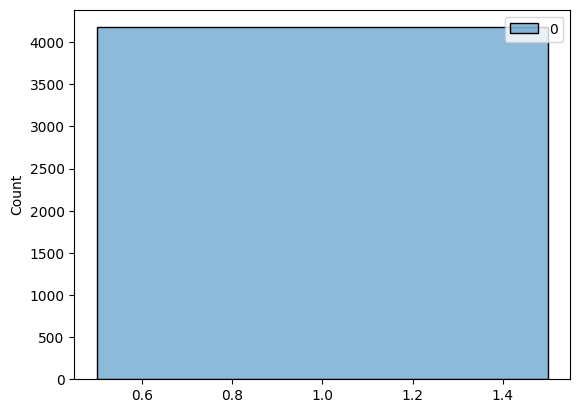

In [55]:
sns.histplot(result)

In [16]:
new_result = []
for value in result:
    if value>=0.5:
        new_result.append('True')
    else:
        new_result.append('False')

In [36]:
test_data = pd.read_csv('test.csv')
df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': new_result})
df.to_csv('submission.csv',index=False)